<a href="https://colab.research.google.com/github/aminabyaneh/Machine_Learning/blob/master/Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Price Prediction

**Amin Mohammad Soleimani Abyaneh 94100805**


In [0]:
!ipython nbconvert --to html Price_Prediction.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook Price_Prediction.ipynb to html
[NbConvertApp] Writing 3042724 bytes to Price_Prediction.html



## Preparations

We begin our work by first mounting and extracting data in Google Colab environment. This is done using mount command which mounts our google drive and then uses unzip to extract **Part1.zip** and **Part2.zip**. 
In each part, we implement the prediction method for one of the datasets to prevent redundancy during the report however with just a change in df_Main these methods are reusable for any data set in Zip1 or Zip2.

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip drive/My\ Drive/colab_files/Part1.zip

Archive:  drive/My Drive/colab_files/Part1.zip
  inflating: C_book.csv              
  inflating: C_ticker.csv            
  inflating: C_trades.csv            
  inflating: A_book.csv              
  inflating: A_ticker.csv            
  inflating: A_trades.csv            
  inflating: B_book.csv              
  inflating: B_ticker.csv            
  inflating: B_trades.csv            


In [0]:
!cat A_ticker.csv


In [0]:
!unzip drive/My\ Drive/colab_files/Part2.zip

Archive:  drive/My Drive/colab_files/Part2.zip
  inflating: E.csv                   
  inflating: A.csv                   
  inflating: B.csv                   
  inflating: C.csv                   
  inflating: D.csv                   


# 1. Regression in Market Data

The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using Backpropagation Through Time and overcomes the vanishing gradient problem. As such, it can be used to create large recurrent networks that in turn can be used to address difficult sequence problems in machine learning and achieve state-of-the-art results.

Instead of neurons, LSTM networks have memory blocks that are connected through layers. A block has components that make it smarter than a classical neuron and a memory for recent sequences. A block contains gates that manage the block’s state and output. A block operates upon an input sequence and each gate within a block uses the sigmoid activation units to control whether they are triggered or not, making the change of state and addition of information flowing through the block conditional.

There are three types of gates within a unit:

* Forget Gate: conditionally decides what information to throw away from the block.
* Input Gate: conditionally decides which values from the input to update the memory state.
* Output Gate: conditionally decides what to output based on input and the memory of the block.
Each unit is like a mini-state machine where the gates of the units have weights that are learned during the training procedure.

You can see how you may achieve sophisticated learning and memory from a layer of LSTMs, and it is not hard to imagine how higher-order abstractions may be layered with multiple such layers.

First we need to load the data, in this case we have three dataset files each can be loaded using read_csv command from pandas.

In [0]:
# Loading the dataset 
import pandas as pd

d = pd.read_csv('A_ticker.csv')
dataset_A = d[d.iloc[:,2] != -1] 

d = pd.read_csv('B_ticker.csv')
dataset_B = d[d.iloc[:,2] != -1]  

d = pd.read_csv('C_ticker.csv')
dataset_C = d[d.iloc[:,2] != -1]  

We name the columns as X1..X9 for better understanding of dataset and check the head of dataset_B to see whether the names are changed correctly or not.

In [0]:
names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9']
for df in [dataset_A, dataset_B, dataset_C]:
  df.columns = names
dataset_B.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,1510555978,81.899417,932.577618,81.925176,863.061274,81.886538,116288.8448,86.291256,79.980403
1,1510556279,81.789943,542.775734,81.809262,1041.552825,81.815702,116285.2944,86.291256,79.980403
2,1510556577,81.796383,363.280927,81.809262,1042.962178,81.802822,115899.6371,86.291256,79.980403
3,1510556878,81.616073,395.477433,81.622512,1153.703546,81.622512,115720.4336,86.291256,79.980403
4,1510557178,81.519478,406.044656,81.551676,1026.107752,81.519478,115655.0382,86.291256,79.980403


We the plot each and everyone of the variables to see the overview of what we are dealing with. As it is shown in next ffigures, we do not have seasonality in dataset variables. Seasonality is a repeating pattern within each year is known as seasonal variation, although the term is applied more generally to repeating patterns within any fixed period. This means we do not have to be worried about seasonality for now.

In [0]:
import matplotlib.pyplot as plt   

def plot_features(df):
  values = df.values
  # specify columns to plot
  groups = range(9)
  # plot each column
  pyplot.figure()
  for g in groups:
      plt.subplots(figsize=(10, 15))
      plt.subplot(len(groups), 1, g + 1)
      plt.plot(values[:, g])
      plt.title(df.columns[g], y=0.5, loc='left')
  plt.show()

<Figure size 432x288 with 0 Axes>

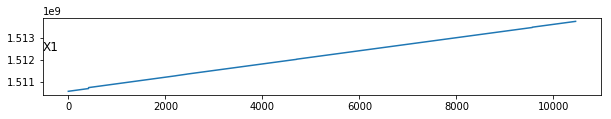

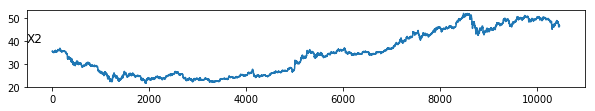

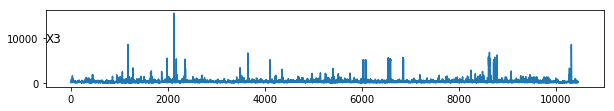

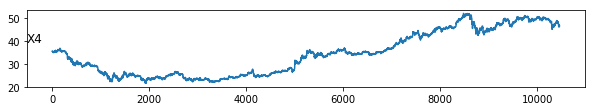

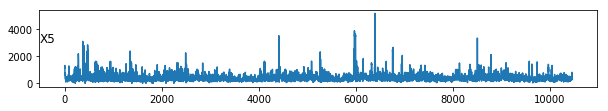

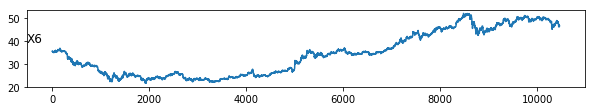

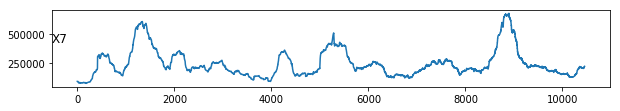

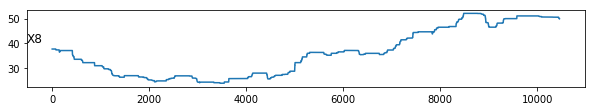

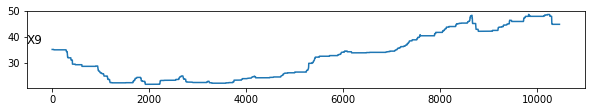

In [0]:
plot_features(dataset_C)

<Figure size 432x288 with 0 Axes>

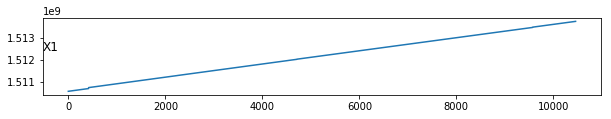

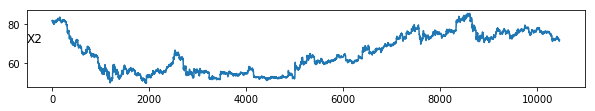

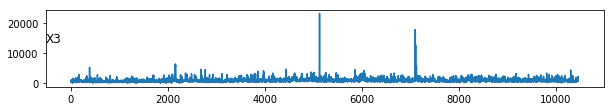

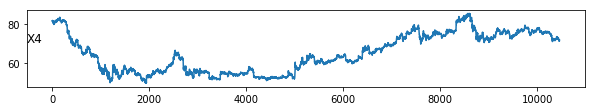

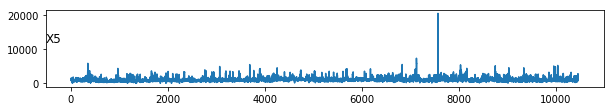

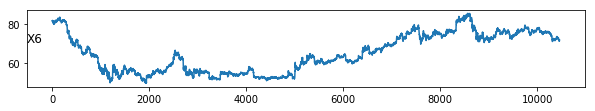

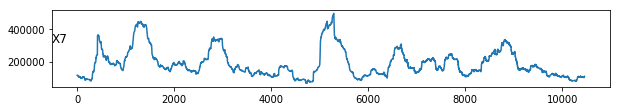

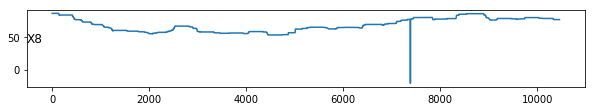

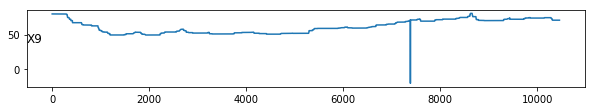

In [0]:
plot_features(dataset_B)

<Figure size 432x288 with 0 Axes>

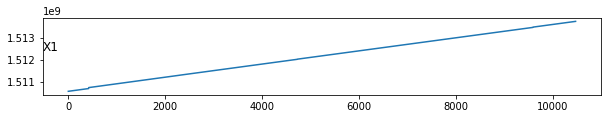

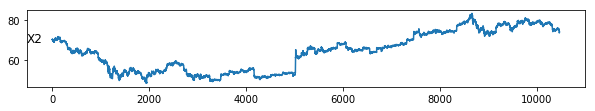

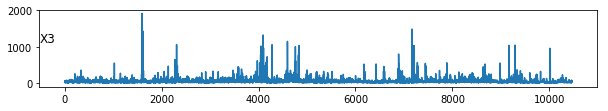

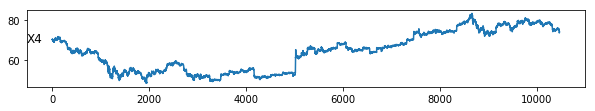

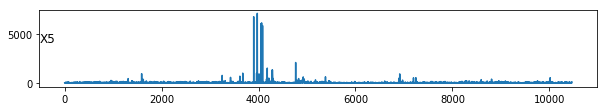

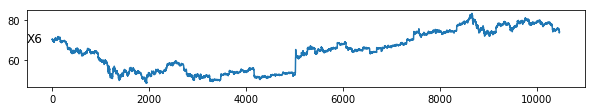

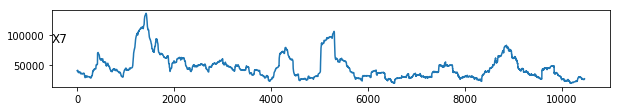

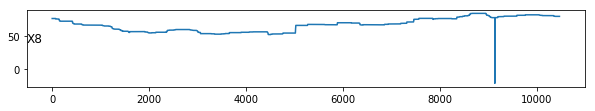

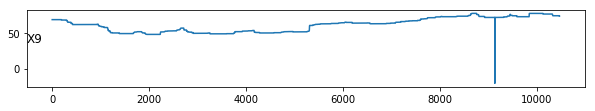

In [0]:
plot_features(dataset_A)

### Predictions for A

In [0]:
# select the main dataset, it can be changed to B, C respectively
df_Main = dataset_A 
df_len = len(df_Main)
print(df_len)

10468


**Normalization** is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges which is the case here. 

In [0]:
# normalize features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
n_features = 9
timesteps = 1

A key function to help transform time series data into a supervised learning problem is the Pandas shift() function.

Given a DataFrame, the shift() function can be used to create copies of columns that are pushed forward (rows of NaN values added to the front) or pulled back (rows of NaN values added to the end).

This is the behavior required to create columns of lag observations as well as columns of forecast observations for a time series dataset in a supervised learning format.

In [0]:
# convert series to supervised learning (from internet)
def series_to_supervised(df, n_in=1, n_out=1, dropnan=True):
	n_vars = df.shape[1]
	cols, names = list(), list()
  
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
   
	# concat all supervised data
	agg = pd.concat(cols, axis=1)
	agg.columns = names

  # drop NaN
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [0]:
# predicting for next 5,10,15,..,50 minutes
from keras.models import Sequential  
from keras.layers import LSTM  
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy import concatenate
from pandas import DataFrame
from pandas import concat

histories = []
rmse = []



for f in range(1, 10):
  # frame as supervised learning
  data_supervised = series_to_supervised(pd.DataFrame(scaler.fit_transform(df_Main)), timesteps, f)
  # split into train and test sets
  values = data_supervised.values
  
  # split into input and outputs
  train_X, train_y = values[:round(0.8 * df_len), :timesteps * n_features], values[:round(0.8 * df_len), -4]
  valid_X, valid_y = values[round(0.8 * df_len) + 1:round(0.9 * df_len), :timesteps * n_features], values[round(0.8 * df_len) + 1:round(0.9 * df_len), -4]
  test_X, test_y   = values[round(0.9 * df_len):, :timesteps * n_features], values[round(0.9 * df_len):, -4]
  
  # reshape input to be 3D [samples, timesteps, features]
  if f == 1:
    TEST_X = test_X
    TEST_Y = test_y
  
  train_X = train_X.reshape((train_X.shape[0], timesteps, n_features))
  valid_X = valid_X.reshape((valid_X.shape[0], timesteps, n_features))
  test_X =  test_X.reshape((test_X.shape[0], timesteps, n_features))
  
  # design network
  model = Sequential()
  model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
  model.add(Dense(1))
  model.compile(loss='mae', optimizer='adam')
  
  # fit network
  history = model.fit(train_X, train_y, epochs=30, batch_size=64, validation_data=(valid_X, valid_y), verbose=1, shuffle=False)
  histories.append(history)
 
  # make a prediction
  y_predict = model.predict(test_X)
  test_X = test_X.reshape(test_X.shape[0], timesteps * n_features)
  
  y_predicted_i = concatenate((test_X[:, -9:-4], y_predict, test_X[:,-3:]), axis=1)
  y_predicted_i = scaler.inverse_transform(y_predicted_i)
  y_predicted_i = y_predicted_i[:,5]

  test_y = test_y.reshape((len(test_y), 1))
  y_actual_i = concatenate((test_X[:, -9:-4], test_y, test_X[:,-3:]), axis=1)
  y_actual_i = scaler.inverse_transform(y_actual_i)
  y_actual_i = y_actual_i[:,5]
  
  
  if f == 1:
    PRED_Y = y_predicted_i
    ACTU_Y = y_actual_i
 
  # calculate and show RMSE
  rmse.append(sqrt(mean_squared_error(y_actual_i, y_predicted_i)))
  print('\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n RMSE for', (f) * 5,"minutes is :",
        sqrt(mean_squared_error(y_actual_i, y_predicted_i)),
        '\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n')

8374/8374 [==============================] - 0s 48us/step - loss: 0.0073 - val_loss: 0.0058
Epoch 30/30
8374/8374 [==============================] - 0s 46us/step - loss: 0.0080 - val_loss: 0.0075

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 RMSE for 5 minutes is : 0.2450033278099484 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Train on 8374 samples, validate on 1046 samples
Epoch 1/30
8374/8374 [==============================] - 2s 179us/step - loss: 0.1093 - val_loss: 0.0378
Epoch 2/30
8374/8374 [==============================] - 0s 50us/step - loss: 0.0659 - val_loss: 0.0391
Epoch 3/30
8374/8374 [==============================] - 0s 54us/step - loss: 0.0571 - val_loss: 0.0246
Epoch 4/30
8374/8374 [==============================] - 0s 56us/step - loss: 0.0426 - val_loss: 0.0416
Epoch 5/30
8374/8374 [==============================] - 0s 54us/step - loss: 0.0352 - val_loss: 0.0360
Epoch 6/30
8374/8374 [==============================] - 0s 51us/step - loss: 0.0210 - val_loss: 0.0124
Epoch 7/30

In [0]:
d = DataFrame(TEST_X)
d.head()

,0,1,2,3,4,5,6,7,8
0,0.898249,0.847947,0.011298,0.847947,0.007668,0.848068,0.117577,0.96045,0.961675
1,0.898343,0.853607,0.029223,0.853607,0.004120,0.853695,0.117954,0.96045,0.961675
2,0.898436,0.853246,0.027821,0.853246,0.005996,0.853334,0.118180,0.96045,0.961675
3,0.898530,0.852102,0.024415,0.852102,0.003630,0.852191,0.116882,0.96045,0.961675
4,0.898623,0.843821,0.010486,0.843821,0.006743,0.843942,0.117484,0.96045,0.961675


,0,1,2,3,4,5,6,7,8
0,0.898249,0.847947,0.011298,0.847947,0.007668,0.848068,0.117577,0.96045,0.961675
1,0.898343,0.853607,0.029223,0.853607,0.004120,0.853695,0.117954,0.96045,0.961675
2,0.898436,0.853246,0.027821,0.853246,0.005996,0.853334,0.118180,0.96045,0.961675
3,0.898530,0.852102,0.024415,0.852102,0.003630,0.852191,0.116882,0.96045,0.961675
4,0.898623,0.843821,0.010486,0.843821,0.006743,0.843942,0.117484,0.96045,0.961675


In [0]:
d = DataFrame(TEST_Y)
d.head()

,0
0,0.853695
1,0.853334
2,0.852191
3,0.843942
4,0.844668


,0
0,0.853695
1,0.853334
2,0.852191
3,0.843942
4,0.844668


In [0]:
d = DataFrame(ACTU_Y)
d.head()

,0
0,78.360236
1,78.347432
2,78.306883
3,78.014383
4,78.040120


,0
0,78.360236
1,78.347432
2,78.306883
3,78.014383
4,78.040120


In [0]:
d = DataFrame(PRED_Y)
d.head()

,0
0,78.076673
1,78.259633
2,78.248655
3,78.211092
4,77.939293


,0
0,78.086233
1,78.273927
2,78.260683
3,78.226079
4,77.946974


In [0]:
mape = (abs(ACTU_Y - PRED_Y)/ACTU_Y).mean()
print(mape)

0.0023450914042665344
0.002293088417838243


RMSE for 5 minutes is: 0.2450033278099484


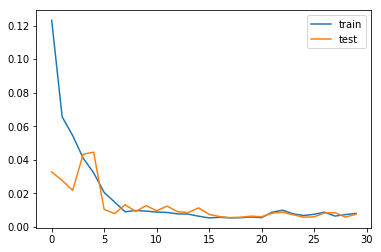

RMSE for 10 minutes is: 0.31988429280738573


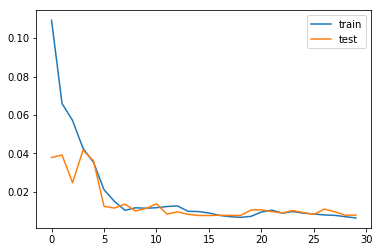

RMSE for 15 minutes is: 0.3393808778946515


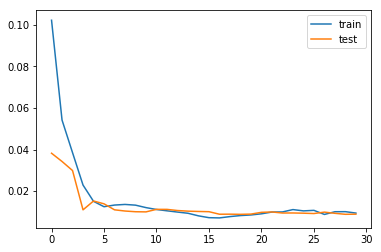

RMSE for 20 minutes is: 0.5905074862796214


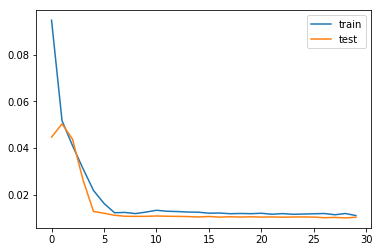

RMSE for 25 minutes is: 0.5512475402931762


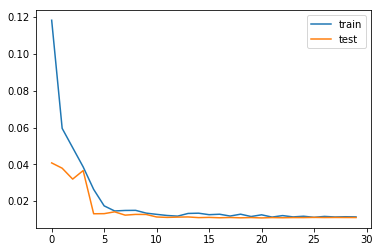

RMSE for 30 minutes is: 0.6223467804649979


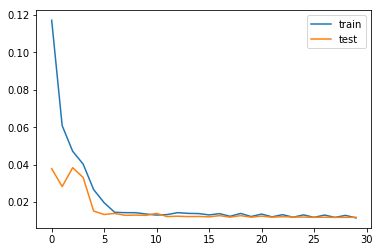

RMSE for 35 minutes is: 0.5784076705761464


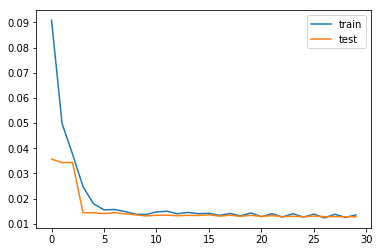

RMSE for 40 minutes is: 0.8068365281684553


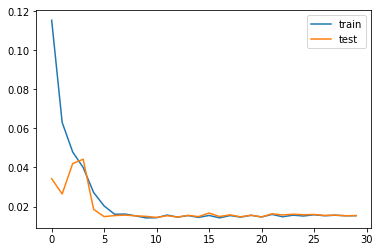

RMSE for 45 minutes is: 0.7578333646065973


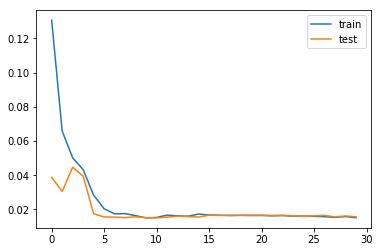

RMSE for 5 minutes is: 0.24015423316208662


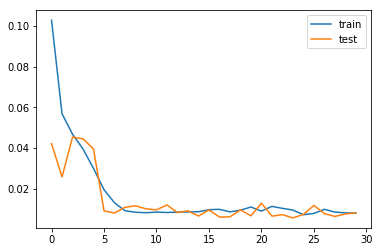

RMSE for 10 minutes is: 0.3364761626060431


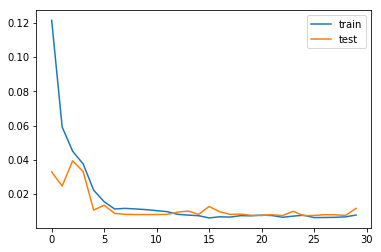

RMSE for 15 minutes is: 0.38812258728151705


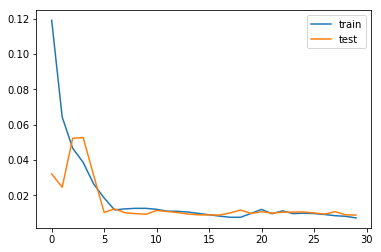

RMSE for 20 minutes is: 0.40698288630017604


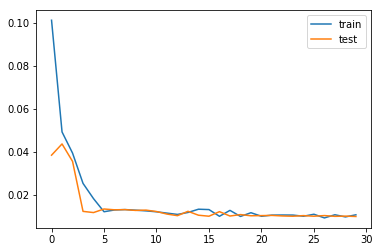

RMSE for 25 minutes is: 0.671695088633196


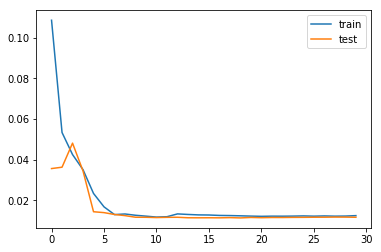

RMSE for 30 minutes is: 0.5205487687757998


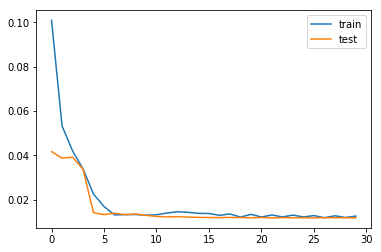

RMSE for 35 minutes is: 0.6012857290075805


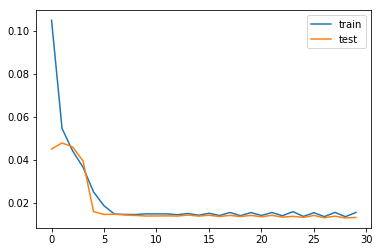

RMSE for 40 minutes is: 0.7787763450505993


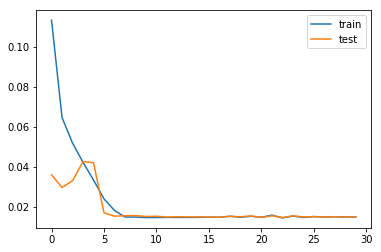

RMSE for 45 minutes is: 0.7640681178638702


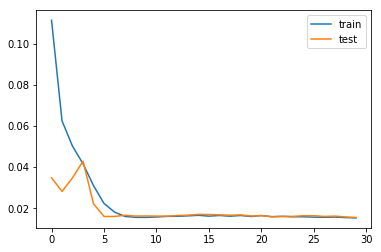

In [0]:
# plot history
def plot_history(history):
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  plt.show()

for i, r, h in zip(range(1, 10), rmse, histories):
  print('RMSE for', i * 5, 'minutes is:', r)
  plot_history(h)

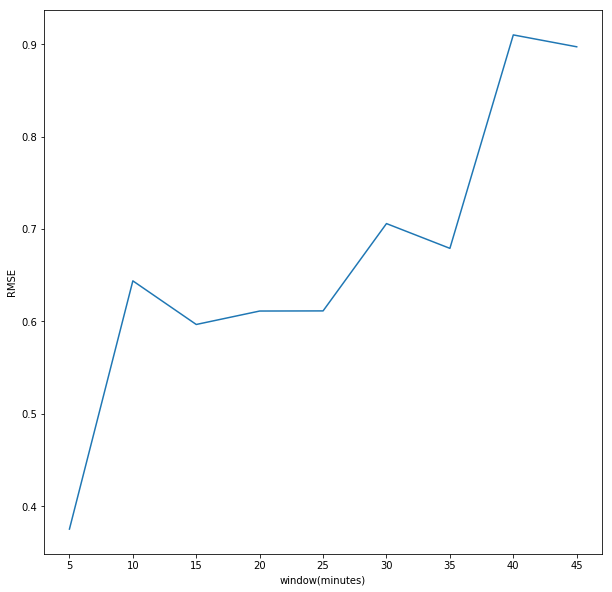

In [0]:
# plotting error with respect to prediction window
plt.figure(figsize=(10,10))
plt.plot([i * 5 for i in range(1, 10)], rmse)
plt.xlabel("window(minutes)")
plt.ylabel("RMSE")
plt.show()

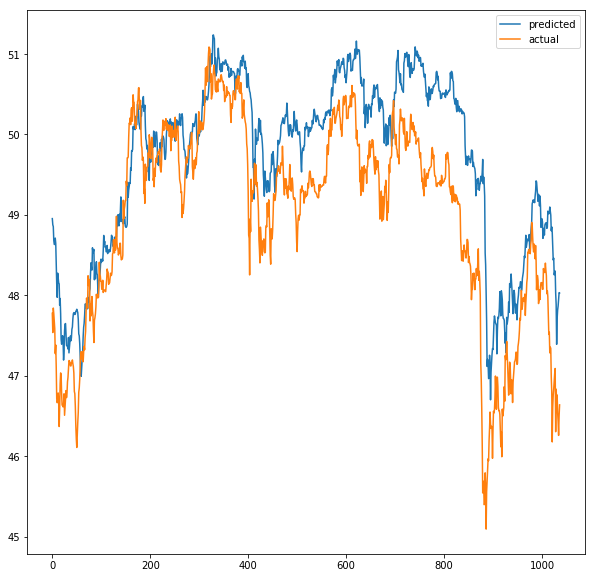

In [0]:
# plotting error with respect to prediction window
plt.figure(figsize=(10,10))
plt.plot(y_predicted_i, label='predicted')
plt.plot(y_actual_i, label='actual')
plt.legend()
plt.show()

### Predictions for B
We start predicting for B in the same manner as A.

In [0]:
# select the main dataset, it can be changed to B, C respectively
df_Main = dataset_B
df_len = len(df_Main)

# normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
n_features = 9
timesteps = 1

histories = []
rmse = []

for f in range(1, 10):
  # frame as supervised learning
  data_supervised = series_to_supervised(pd.DataFrame(scaler.fit_transform(df_Main)), timesteps, f)
  # split into train and test sets
  values = data_supervised.values
  
  # split into input and outputs
  train_X, train_y = values[:round(0.8 * df_len), :timesteps * n_features], values[:round(0.8 * df_len), -4]
  valid_X, valid_y = values[round(0.8 * df_len) + 1:round(0.9 * df_len), :timesteps * n_features], values[round(0.8 * df_len) + 1:round(0.9 * df_len), -4]
  test_X, test_y   = values[round(0.9 * df_len):, :timesteps * n_features], values[round(0.9 * df_len):, -4]
  train_X = train_X.reshape((train_X.shape[0], timesteps, n_features))
  valid_X = valid_X.reshape((valid_X.shape[0], timesteps, n_features))
  test_X =  test_X.reshape((test_X.shape[0], timesteps, n_features))
  
  # design network
  model = Sequential()
  model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
  model.add(Dense(1))
  model.compile(loss='mae', optimizer='adam')
  history = model.fit(train_X, train_y, epochs=30, batch_size=64, validation_data=(valid_X, valid_y), verbose=1, shuffle=False)
  histories.append(history)
 
  # make a prediction
  y_predict = model.predict(test_X)
  test_X = test_X.reshape(test_X.shape[0], timesteps * n_features)
  
  y_predicted_i = concatenate((test_X[:, -9:-4], y_predict, test_X[:,-3:]), axis=1)
  y_predicted_i = scaler.inverse_transform(y_predicted_i)
  y_predicted_i = y_predicted_i[:,5]

  test_y = test_y.reshape((len(test_y), 1))
  y_actual_i = concatenate((test_X[:, -9:-4], test_y, test_X[:,-3:]), axis=1)
  y_actual_i = scaler.inverse_transform(y_actual_i)
  y_actual_i = y_actual_i[:,5]
 
  # calculate and show RMSE
  rmse.append(sqrt(mean_squared_error(y_actual_i, y_predicted_i)))
  print('\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n RMSE for', (f) * 5,"minutes is :",
        sqrt(mean_squared_error(y_actual_i, y_predicted_i)),
        '\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n')

Train on 8367 samples, validate on 1045 samples
Epoch 1/30
8367/8367 [==============================] - 5s 570us/step - loss: 0.1248 - val_loss: 0.0633
Epoch 2/30
8367/8367 [==============================] - 0s 48us/step - loss: 0.0807 - val_loss: 0.0457
Epoch 3/30
8367/8367 [==============================] - 0s 48us/step - loss: 0.0530 - val_loss: 0.0307
Epoch 4/30
8367/8367 [==============================] - 0s 47us/step - loss: 0.0382 - val_loss: 0.0237
Epoch 5/30
8367/8367 [==============================] - 0s 50us/step - loss: 0.0271 - val_loss: 0.0103
Epoch 6/30
8367/8367 [==============================] - 0s 51us/step - loss: 0.0129 - val_loss: 0.0137
Epoch 7/30
8367/8367 [==============================] - 0s 53us/step - loss: 0.0180 - val_loss: 0.0159
Epoch 8/30
8367/8367 [==============================] - 0s 50us/step - loss: 0.0165 - val_loss: 0.0202
Epoch 9/30
8367/8367 [==============================] - 0s 51us/step - loss: 0.0140 - val_loss: 0.0205
Epoch 10/30
8367/8367 [=

We then plot histories and RMSE for dataset_B.

RMSE for 5 minutes is: 0.4396169334514734


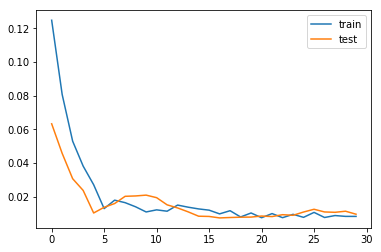

RMSE for 10 minutes is: 0.5630704074027503


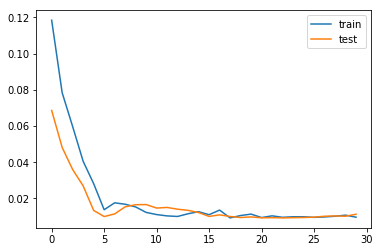

RMSE for 15 minutes is: 0.4044805388611408


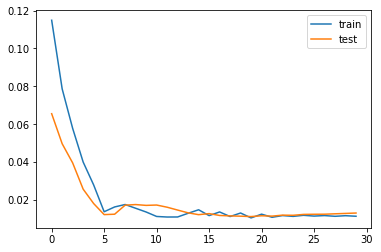

RMSE for 20 minutes is: 0.9287212852919167


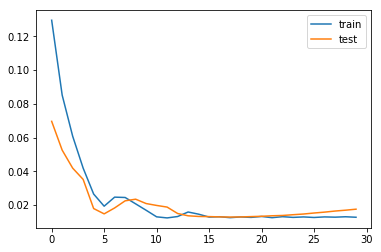

RMSE for 25 minutes is: 0.6618679103429037


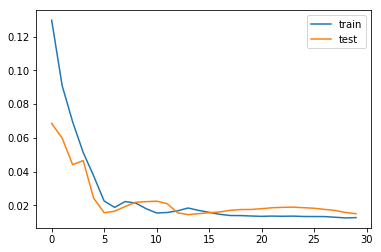

RMSE for 30 minutes is: 0.75440388994186


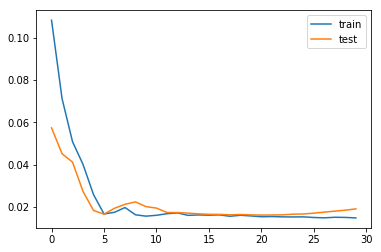

RMSE for 35 minutes is: 0.844522210203235


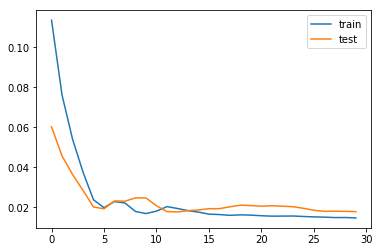

RMSE for 40 minutes is: 1.222027446736861


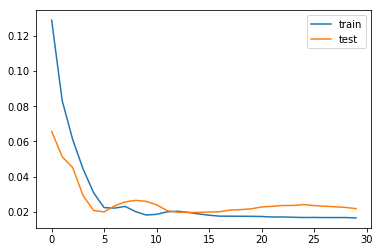

RMSE for 45 minutes is: 1.1656182588474575


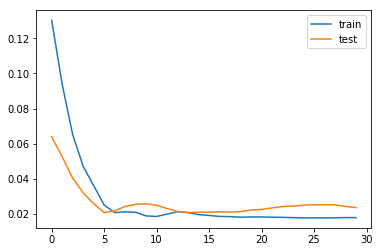

In [0]:
for i, r, h in zip(range(1, 10), rmse, histories):
  print('RMSE for', i * 5, 'minutes is:', r)
  plot_history(h)

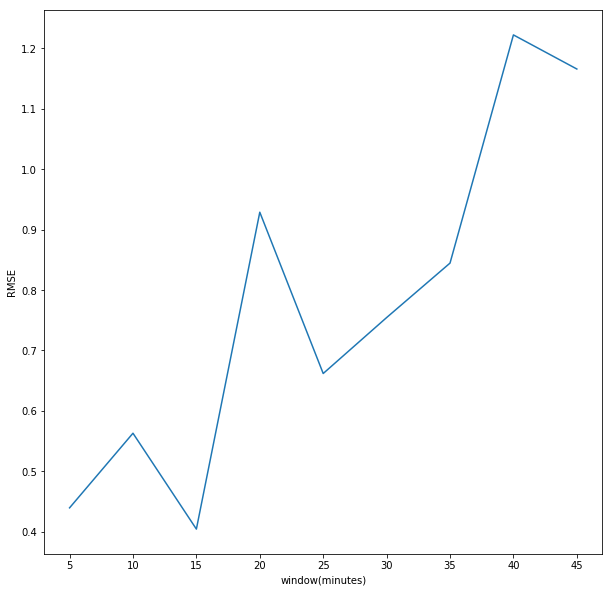

In [0]:
# plotting error with respect to prediction window
plt.figure(figsize=(10,10))
plt.plot([i * 5 for i in range(1, 10)], rmse)
plt.xlabel("window(minutes)")
plt.ylabel("RMSE")
plt.show()

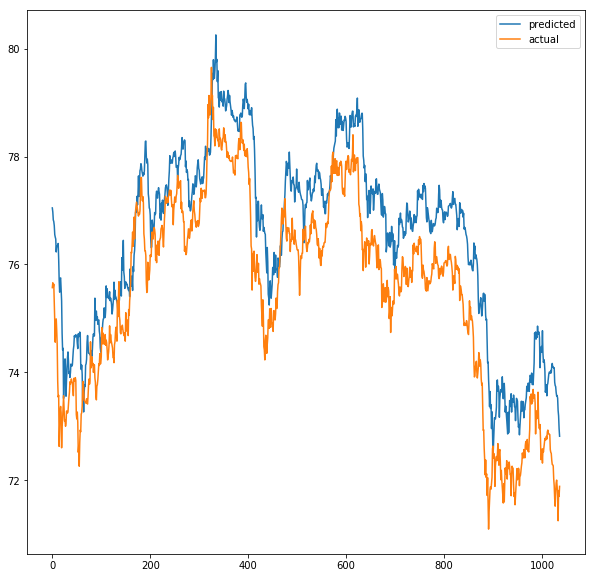

In [0]:
# plotting error with respect to prediction window
plt.figure(figsize=(10,10))
plt.plot(y_predicted_i, label='predicted')
plt.plot(y_actual_i, label='actual')
plt.legend()
plt.show()

### Predictions for C
We start predicting for C in the same manner as A and B. Then we plot the errors and histories of LSTM model for dataset_C.

In [0]:
# select the main dataset, it can be changed to B, C respectively
df_Main = dataset_C
df_len = len(df_Main)

# normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
n_features = 9
timesteps = 1

histories = []
rmse = []

for f in range(1, 10):
  # frame as supervised learning
  data_supervised = series_to_supervised(pd.DataFrame(scaler.fit_transform(df_Main)), timesteps, f)
  # split into train and test sets
  values = data_supervised.values
  
  # split into input and outputs
  train_X, train_y = values[:round(0.8 * df_len), :timesteps * n_features], values[:round(0.8 * df_len), -4]
  valid_X, valid_y = values[round(0.8 * df_len) + 1:round(0.9 * df_len), :timesteps * n_features], values[round(0.8 * df_len) + 1:round(0.9 * df_len), -4]
  test_X, test_y   = values[round(0.9 * df_len):, :timesteps * n_features], values[round(0.9 * df_len):, -4]
  
  # reshape input to be 3D [samples, timesteps, features]
  if f == 1:
    TEST_X = test_X
    TEST_Y = test_y
  
  train_X = train_X.reshape((train_X.shape[0], timesteps, n_features))
  valid_X = valid_X.reshape((valid_X.shape[0], timesteps, n_features))
  test_X =  test_X.reshape((test_X.shape[0], timesteps, n_features))
  
  # design network
  model = Sequential()
  model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
  model.add(Dense(1))
  model.compile(loss='mae', optimizer='adam')
  
  # fit network
  history = model.fit(train_X, train_y, epochs=30, batch_size=64, validation_data=(valid_X, valid_y), verbose=1, shuffle=False)
  histories.append(history)
 
  # make a prediction
  y_predict = model.predict(test_X)
  test_X = test_X.reshape(test_X.shape[0], timesteps * n_features)
  
  y_predicted_i = concatenate((test_X[:, -9:-4], y_predict, test_X[:,-3:]), axis=1)
  y_predicted_i = scaler.inverse_transform(y_predicted_i)
  y_predicted_i = y_predicted_i[:,5]

  test_y = test_y.reshape((len(test_y), 1))
  y_actual_i = concatenate((test_X[:, -9:-4], test_y, test_X[:,-3:]), axis=1)
  y_actual_i = scaler.inverse_transform(y_actual_i)
  y_actual_i = y_actual_i[:,5]
  
  
  if f == 1:
    PRED_Y = y_predicted_i
    ACTU_Y = y_actual_i
 
  # calculate and show RMSE
  rmse.append(sqrt(mean_squared_error(y_actual_i, y_predicted_i)))
  print('\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n RMSE for', (f) * 5,"minutes is :",
        sqrt(mean_squared_error(y_actual_i, y_predicted_i)),
        '\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n')

Train on 8366 samples, validate on 1045 samples
Epoch 1/30
8366/8366 [==============================] - 7s 812us/step - loss: 0.0701 - val_loss: 0.0494
Epoch 2/30
8366/8366 [==============================] - 0s 56us/step - loss: 0.0460 - val_loss: 0.0286
Epoch 3/30
8366/8366 [==============================] - 0s 54us/step - loss: 0.0315 - val_loss: 0.0353
Epoch 4/30
8366/8366 [==============================] - 0s 57us/step - loss: 0.0278 - val_loss: 0.0550
Epoch 5/30
8366/8366 [==============================] - 0s 58us/step - loss: 0.0248 - val_loss: 0.0157
Epoch 6/30
8366/8366 [==============================] - 0s 56us/step - loss: 0.0185 - val_loss: 0.0272
Epoch 7/30
8366/8366 [==============================] - 0s 56us/step - loss: 0.0230 - val_loss: 0.0247
Epoch 8/30
8366/8366 [==============================] - 0s 55us/step - loss: 0.0191 - val_loss: 0.0326
Epoch 9/30
8366/8366 [==============================] - 0s 58us/step - loss: 0.0175 - val_loss: 0.0237
Epoch 10/30
8366/8366 [=

RMSE for 5 minutes is: 0.37500690153092864


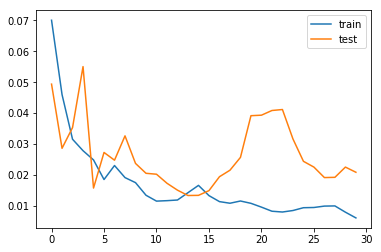

RMSE for 10 minutes is: 0.6438227871237514


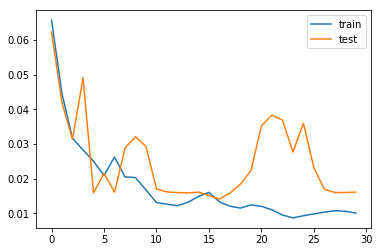

RMSE for 15 minutes is: 0.5965923131064846


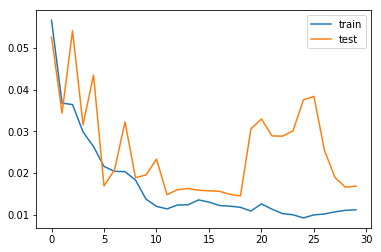

RMSE for 20 minutes is: 0.6111463087779483


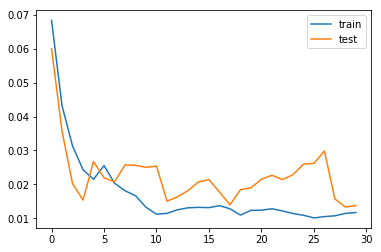

RMSE for 25 minutes is: 0.6112907904294904


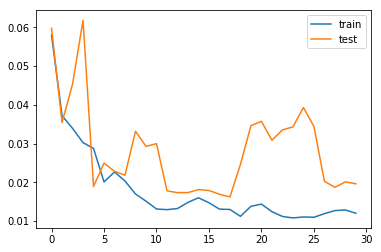

RMSE for 30 minutes is: 0.7058473027168066


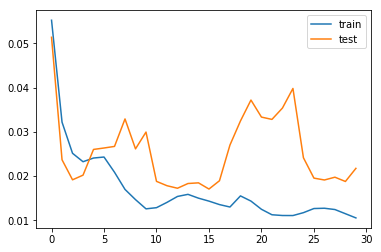

RMSE for 35 minutes is: 0.679026488963056


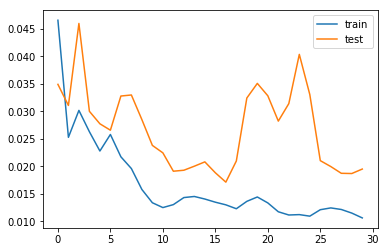

RMSE for 40 minutes is: 0.9101749822698504


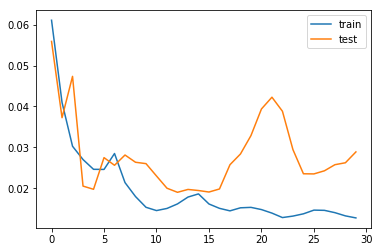

RMSE for 45 minutes is: 0.8973080552728292


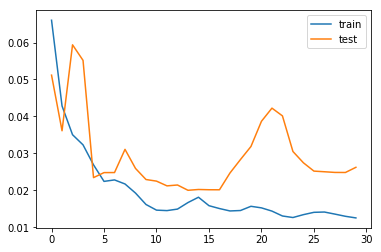

In [0]:
for i, r, h in zip(range(1, 10), rmse, histories):
  print('RMSE for', i * 5, 'minutes is:', r)
  plot_history(h)

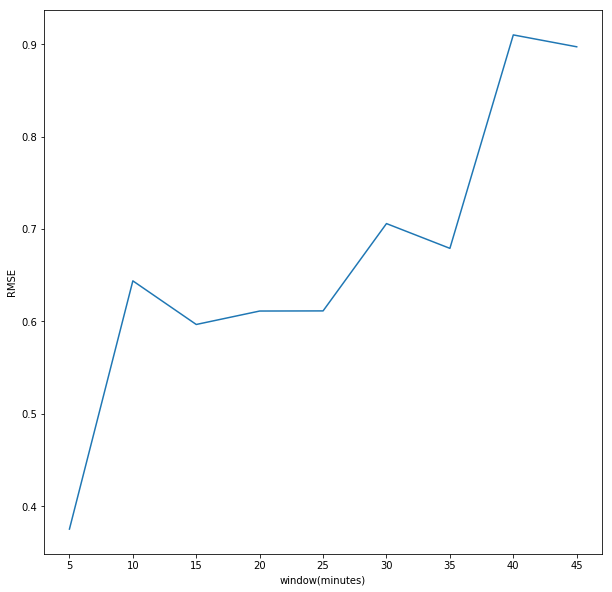

In [0]:
# plotting error with respect to prediction window
plt.figure(figsize=(10,10))
plt.plot([i * 5 for i in range(1, 10)], rmse)
plt.xlabel("window(minutes)")
plt.ylabel("RMSE")
plt.show()

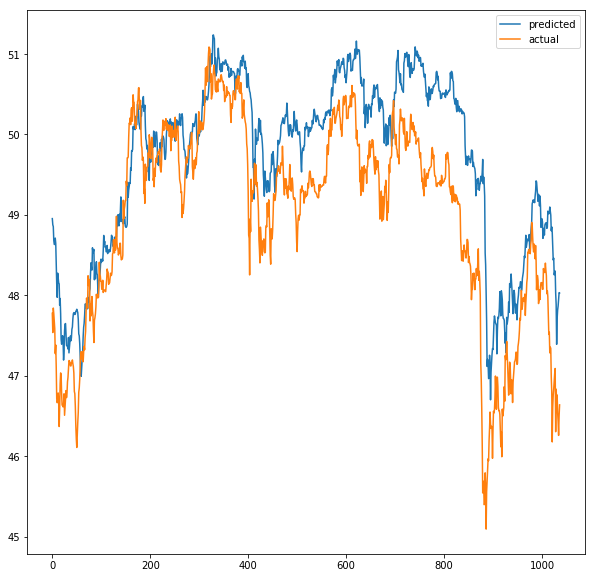

In [0]:
# plotting error with respect to prediction window
plt.figure(figsize=(10,10))
plt.plot(y_predicted_i, label='predicted')
plt.plot(y_actual_i, label='actual')
plt.legend()
plt.show()

# 2. Classification in Markets 

In this section we try to understand and predict the overall trend of the market. We recommend buying if trend is to rise in next day. We employ three main methods to achieve this goal. 


1.   Logistic Regression
2.   ARIMA
3.   LSTM

We now understand that we are dealing with **time series** dataset. A time series is composed of a sequence of measurements indexed by a subset of
the integers. The ordering of the index implies a sequential ordering of the observa
tions, and indeed, a times series is often measured at successive points in time. It is mathematically deﬁned as a set of vectors x(t), t = 0,1,2,··· where t represents the time elapsed.
A time series can be either univariate or multivariate depending on the number of
observations recorded at equally spaced time intervals. However, time is not always
contiguous. For example, stock prices are equispaced for all weekdays but are
not available during weekends because the stock market is closed. A function x(t)
where t is a continuous variable is called a continuous time series. Examples include
temperature readings, river ﬂow, and change of height. On the other hand, many
measurements are recorded at discrete points of time such as currency exchanges, the
number of population growth and death. A continuous time series can be easily trans
formed into a discrete one by just grouping data within speciﬁc time intervals. Time
series can be either linear or nonlinear depending on whether or not the dependent
variable and all its lagged values appear in a linear fashion.

In time series forecasting, past observations are collected and analyzed to develop
a mathematical model describing the underlying data generating process for the series. After decomposition, we can proceed to make a prediction of each component.
When detecting a seasonal component, we often assume it varies little in the future.
Therefore, past seasonal eﬀects are used to forecast seasonality in the future. Since
a time series is non-deterministic in nature, which we cannot know for certain what
will happen even short term, the analysis must reach beyond single-instant variable
and instead deal with the joint probability distribution of time series components.


## 2. A: Investigation on Data

We have five datasets. Using pandas we start reading the datasets into df_X where X is the name of dataset eg. A. After that we notice that PER column is redundant and does not contain any information so we drop the PER column from each data frame.

In [0]:
import pandas as pd
df_A = pd.read_csv('A.csv')
df_B = pd.read_csv('B.csv')
df_C = pd.read_csv('C.csv')
df_D = pd.read_csv('D.csv')
df_E = pd.read_csv('E.csv')

df_A = df_A.drop(columns=['<PER>']) 
df_B = df_B.drop(columns=['<PER>'])
df_C = df_C.drop(columns=['<PER>'])
df_D = df_D.drop(columns=['<PER>'])
df_E = df_E.drop(columns=['<PER>'])
df_A.head(5)

,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<OPEN>,<LAST>
0,20010325,2798,2802,2798,2800,310368080.0,110870,115,2798,2800
1,20010326,2801,2810,2797,2798,270595190.0,96613,98,2800,2798
2,20010327,2795,2800,2795,2795,466405131.0,166600,120,2798,2795
3,20010328,2800,2849,2796,2849,227566666.0,80676,104,2795,2849
4,20010331,2840,2848,2800,2838,500068371.0,177362,161,2849,2838


We create a list of datasets which allows us to manipulate the data in more convinient way. We then check the length of the list so that we make sure all datasets are correctly added to the list.

In [0]:
df_list = [df_A, df_B, df_C, df_D, df_E]
len(df_list)

5

Another step is to change the names of columns for each dataset. This is due to inconvenience previous naming system. We check the head of the dataset afterwards to make sure that this renaming operation is correctly done.

In [0]:
for df in df_list:
  df.rename(columns={'<DTYYYYMMDD>':'date',
                       '<FIRST>':'first',
                       '<HIGH>':'high',
                       '<LOW>':'low',
                       '<CLOSE>':'close',
                       '<VALUE>':'value',
                       '<VOL>': 'volume',
                       '<OPENINT>':'openint',
                       '<OPEN>':'open',
                       '<LAST>':'last'}, 
                   inplace=True)

df_A.head(5)

,date,first,high,low,close,value,volume,openint,open,last
0,20010325,2798,2802,2798,2800,310368080.0,110870,115,2798,2800
1,20010326,2801,2810,2797,2798,270595190.0,96613,98,2800,2798
2,20010327,2795,2800,2795,2795,466405131.0,166600,120,2798,2795
3,20010328,2800,2849,2796,2849,227566666.0,80676,104,2795,2849
4,20010331,2840,2848,2800,2838,500068371.0,177362,161,2849,2838


In [0]:
df_B.head(5)

,date,first,high,low,close,value,volume,openint,open,last
0,20190515,2101,2197,2101,2188,5.027526e+09,2297895,234,2093,2197
1,20190514,2129,2148,2049,2093,1.424892e+09,672113,144,2047,2148
2,20190513,1938,2100,1938,2047,6.726002e+08,325883,107,2040,2080
3,20190512,2090,2140,2038,2040,2.274521e+09,1114954,129,2145,2038
4,20190511,2179,2180,2051,2145,9.238380e+08,431941,101,2150,2147


We import the necessary libraries. These would become handy in next seactions to plot and normalize the data. Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. MinMaxScaler(feature_range=(0, 1), copy=True) transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [0]:
# plot within notebook
import matplotlib.pyplot as plt

# for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

Pandas set_index() is a method to set a List, Series or Data frame as an index of a Data Frame. Pandas DataFrame is a 2-D labeled data structure with columns of a potentially different type. Pandas DataFrame is nothing but an in-memory representation of an excel sheet via Python programming language. The index object is an immutable array. Indexing allows us to access a row or column using the label. We can use df.index instead to set a column as the index of data frame object.

Using the to_datetime function, specifying a format to match our data as we have saw in the head which is **YearMonthDay** this method gives us the converted version of date time, after that the date column is redundant so we drop it from dataframe.

In [0]:
# setting index as date
for df in df_list:
  df['date'] = pd.to_datetime(df.date, format='%Y%m%d')
  df.index = df['date']
  df = df.drop(['date'], axis=1)

df_A.head()

,date,first,high,low,close,value,volume,openint,open,last
date,,,,,,,,,,
2001-03-25,2001-03-25,2798,2802,2798,2800,310368080.0,110870,115,2798,2800
2001-03-26,2001-03-26,2801,2810,2797,2798,270595190.0,96613,98,2800,2798
2001-03-27,2001-03-27,2795,2800,2795,2795,466405131.0,166600,120,2798,2795
2001-03-28,2001-03-28,2800,2849,2796,2849,227566666.0,80676,104,2795,2849
2001-03-31,2001-03-31,2840,2848,2800,2838,500068371.0,177362,161,2849,2838


Next, we plot few variables from the df_A dataframe. These include value and open and close which are rather important features to predict the trand of a stock price.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


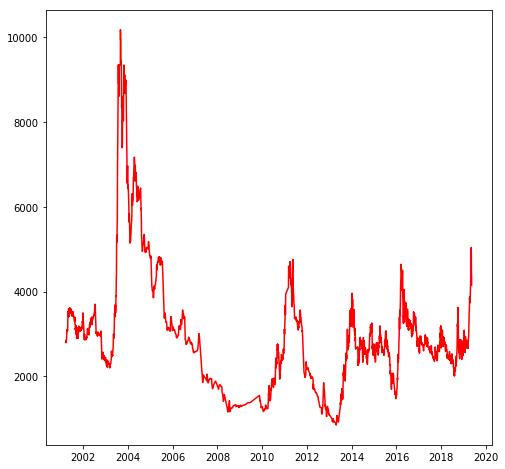

In [0]:
# plot close prices
plt.figure(figsize=(8,8))
plt.plot(df_A['close'], label='Close Price history', c='r')

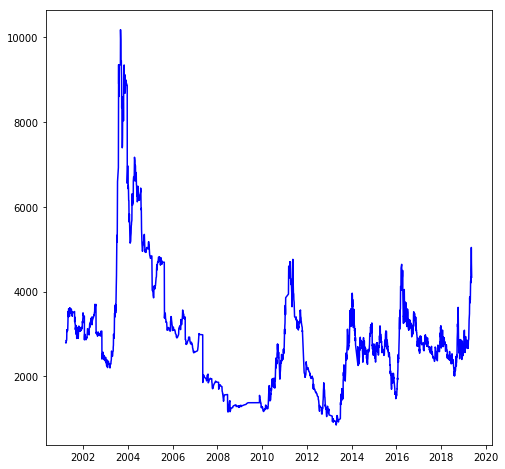

In [0]:
plt.figure(figsize=(8,8))
plt.plot(df_A['open'], label='Stock open value history', c='b')

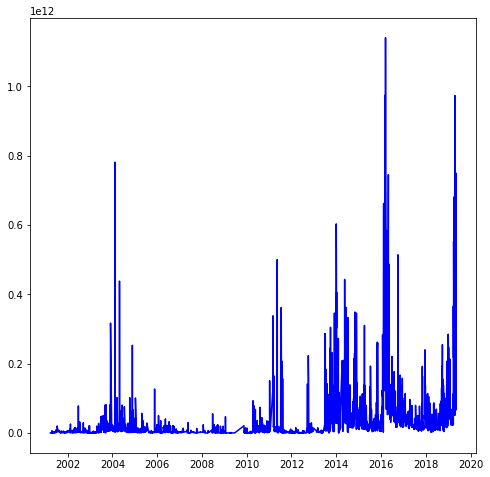

In [0]:
plt.figure(figsize=(8,8))
plt.plot(df_A['value'], label='Stock open value history', c='b')

As we saw, the data of close and open are quite correlated so we decide to plot the correlation matrix for datasets. A **correlation matrix** is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This helps us to determine the highly correlated features and drop them in next stages of our implementation.
Each cell in the table shows the correlation between two variables.

For example for the first figure, **last, open, first, high, low, close** are considered as highly correlated variables so the do not add any efficient information on data and we will drop them when implementing prediction methods.


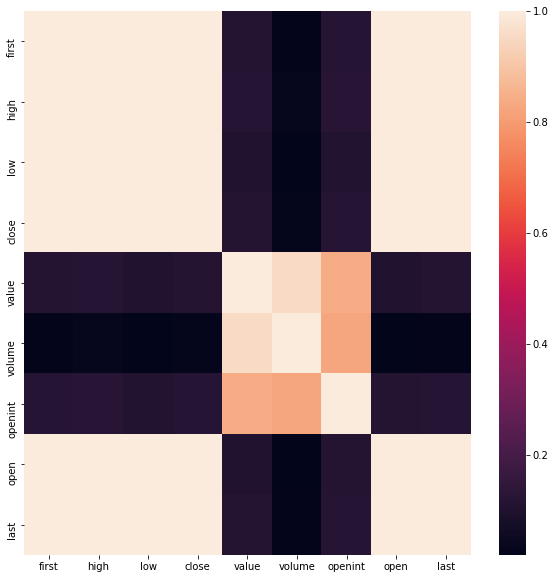

In [0]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
corr = df_A.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

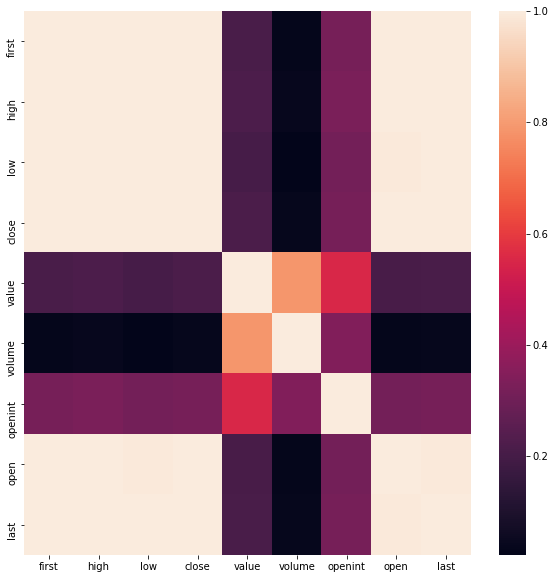

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr = df_B.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

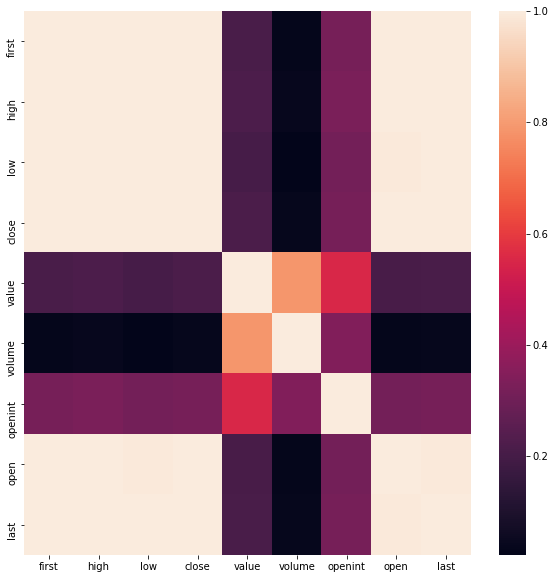

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr = df_B.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

In [0]:
df_A.head(5)

,date,first,high,low,close,value,volume,openint,open,last
date,,,,,,,,,,
2001-03-25,2001-03-25,2798,2802,2798,2800,310368080.0,110870,115,2798,2800
2001-03-26,2001-03-26,2801,2810,2797,2798,270595190.0,96613,98,2800,2798
2001-03-27,2001-03-27,2795,2800,2795,2795,466405131.0,166600,120,2798,2795
2001-03-28,2001-03-28,2800,2849,2796,2849,227566666.0,80676,104,2795,2849
2001-03-31,2001-03-31,2840,2848,2800,2838,500068371.0,177362,161,2849,2838


We need to add another variable to data called **buy**. buy indicates weather we should buy the ccurrent share at this time or not. We set buy to true if the **dprice** variable is greater than zero. We set the **dprice = price(t + 1) - price(t)** so if it is positive then we are allowed to buy the share because we know that is is going to rise in the next day.

In [0]:
# add the buy indicator vector to end of dataframe
for df in df_list:
  df['dprice'] = df['last'].shift(-1) - df['last']
  df['buy'] = (df['dprice'] > 0).astype(int)
  df = df.sort_index(ascending=True, axis=0)

df_A.head(10)

,date,first,high,low,close,value,volume,openint,open,last,dprice,buy
date,,,,,,,,,,,,
2001-03-25,2001-03-25,2798,2802,2798,2800,3.103681e+08,110870,115,2798,2800,-2.0,0
2001-03-26,2001-03-26,2801,2810,2797,2798,2.705952e+08,96613,98,2800,2798,-3.0,0
2001-03-27,2001-03-27,2795,2800,2795,2795,4.664051e+08,166600,120,2798,2795,54.0,1
2001-03-28,2001-03-28,2800,2849,2796,2849,2.275667e+08,80676,104,2795,2849,-11.0,0
2001-03-31,2001-03-31,2840,2848,2800,2838,5.000684e+08,177362,161,2849,2838,30.0,1
2001-04-03,2001-04-03,2840,2870,2838,2868,1.580532e+08,55562,86,2838,2868,32.0,1
2001-04-07,2001-04-07,2868,2930,2868,2900,3.551576e+08,122642,144,2868,2900,104.0,1
2001-04-08,2001-04-08,2920,3020,2903,3004,8.905388e+08,299359,270,2900,3004,98.0,1
2001-04-09,2001-04-09,3028,3140,3020,3102,1.349633e+09,434320,378,3004,3102,-22.0,0


In [0]:
df_A.tail(1)

,date,first,high,low,close,value,volume,openint,open,last,dprice,buy
date,,,,,,,,,,,,
2019-05-12,2019-05-12,4301,4320,4123,4159,6.798367e+10,16347787,1206,4340,4123,NaN,0


## 2. B: Logistic Regression Classification

Logistic regression is often preferred to linear regression for numerous
reasons:
  1. Linear regression assumes errors to be normally distributed but sometimes errors
are not normally distributed.
  2. Linear regression maps data to continuous real numbers but sometimes the
response variable is categorical
  3. In linear regression, parameters are estimated via minimizing the sum of squared
errors. However, in logistic regression, maximum likelihood estimation (MSE)
is used to solve for the parameters to best ﬁt the time series.


We can fit a simple logistic regression model and include time as a covariate, this would imply a linear time trend. Note that in the regression, the time trend is negative and insignificant – you simply have too few observations to make any statements regarding the coefficient of a linear time trend.

For a stock analyst, it is crucial to make predictions of future pricing and volatil
ity accurately. Both underestimates and overestimates of the predictive power of a
forecast model can lead to a huge loss of money and time. Traditional ARMA models
are good at dealing with stationary and linear time series. But in reality, trans
action volume and pricing can be aﬀected by transient and extreme events which
disrupt the stationary assumption of an ARMA model. A machine learning classiﬁer
is therefore widely used for the analysis of delay prediction of irregular time series
data.

In [0]:
# split into train and validation
df_Main = df_D
df_Main.head()

,date,first,high,low,close,value,volume,openint,open,last,dprice,buy
date,,,,,,,,,,,,
2019-05-15,2019-05-15,52423,53335,51502,52482,2.295795e+10,437442,541,52420,52414,-114.0,0
2019-05-14,2019-05-14,51500,53249,51500,52420,3.683749e+10,702736,808,50893,52300,-950.0,0
2019-05-13,2019-05-13,49960,51444,49820,50893,4.424507e+10,869374,725,49279,51350,-1650.0,0
2019-05-12,2019-05-12,49502,49780,48200,49279,3.472629e+10,704681,795,49825,49700,-220.0,0
2019-05-11,2019-05-11,49949,49969,48802,49825,1.495680e+11,3001832,1810,47590,49480,-1887.0,0


In [0]:

df_train = df_Main[:round(0.8 * len(df_Main))]
df_test  = df_Main[round(0.8 * len(df_Main)) + 1:]

X_train = df_train.drop(['dprice', 'buy', 'date'], axis=1)
y_train = df_train['buy']

X_test = df_test.drop(['dprice', 'buy', 'date'], axis=1)
y_test = df_test['buy']

In [0]:
X_train = series_to_supervised(X_train)
X_test = series_to_supervised(X_test)

In [0]:
X_test.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t)
date,,,,,,,,,,,,,,,,,,
2004-08-31,14115.0,14550.0,14115.0,14155.0,1.578893e+10,1087575.0,65.0,14115.0,14155.0,14121,14400,13984,14115,2.028953e+09,143942,71,14120,14115
2004-08-29,14121.0,14400.0,13984.0,14115.0,2.028953e+09,143942.0,71.0,14120.0,14115.0,14404,14525,14073,14120,1.303355e+10,900011,63,14071,14120
2004-08-28,14404.0,14525.0,14073.0,14120.0,1.303355e+10,900011.0,63.0,14071.0,14120.0,14000,14631,13935,14071,4.695223e+09,329079,117,13935,14071
2004-08-25,14000.0,14631.0,13935.0,14071.0,4.695223e+09,329079.0,117.0,13935.0,14071.0,13397,13935,13397,13935,2.533324e+09,189096,67,14102,13935
2004-08-24,13397.0,13935.0,13397.0,13935.0,2.533324e+09,189096.0,67.0,14102.0,13935.0,13725,14102,13725,14102,2.787623e+10,2030563,172,14447,14102


In [0]:
X = scaler.fit_transform(X_train)
y = y_train

In [0]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs').fit(X, y[:len(y) - 1, ])
predictions = lr_model.predict(X=X_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test[:len(y_test) - 1,])

0.5857740585774058

## 2. C: Using ARIMA Regression

**ARIMA** models are, in theory, the most general class of models for forecasting a time series which can be made to be “stationary” by differencing (if necessary), perhaps in conjunction with nonlinear transformations such as logging or deflating (if necessary). A random variable that is a time series is stationary if its statistical properties are all constant over time.  A stationary series has no trend, its variations around its mean have a constant amplitude, and it wiggles in a consistent fashion, i.e., its short-term random time patterns always look the same in a statistical sense.  The latter condition means that its autocorrelations (correlations with its own prior deviations from the mean) remain constant over time, or equivalently, that its power spectrum remains constant over time.  A random variable of this form can be viewed (as usual) as a combination of signal and noise, and the signal (if one is apparent) could be a pattern of fast or slow mean reversion, or sinusoidal oscillation, or rapid alternation in sign, and it could also have a seasonal component.  An ARIMA model can be viewed as a “filter” that tries to separate the signal from the noise, and the signal is then extrapolated into the future to obtain forecasts.

The ARIMA forecasting equation for a stationary time series is a linear (i.e., regression-type) equation in which the predictors consist of lags of the dependent variable and/or lags of the forecast errors.  That is:

* **Predicted value of Y = a constant and/or a weighted sum of one or more recent values of Y and/or a weighted sum of one or more recent values of the errors.**

If the predictors consist only of lagged values of Y, it is a pure autoregressive (“self-regressed”) model, which is just a special case of a regression model and which could be fitted with standard regression software.  For example, a first-order autoregressive (“AR(1)”) model for Y is a simple regression model in which the independent variable is just Y lagged by one period (LAG(Y,1) in Statgraphics or Y_LAG1 in RegressIt).  If some of the predictors are lags of the errors, an ARIMA model it is NOT a linear regression model, because there is no way to specify “last period’s error” as an independent variable:  the errors must be computed on a period-to-period basis when the model is fitted to the data.  From a technical standpoint, the problem with using lagged errors as predictors is that the model’s predictions are not linear functions of the coefficients, even though they are linear functions of the past data.  So, coefficients in ARIMA models that include lagged errors must be estimated by nonlinear optimization methods (“hill-climbing”) rather than by just solving a system of equations.

The acronym ARIMA stands for Auto-Regressive Integrated Moving Average. Lags of the stationarized series in the forecasting equation are called "autoregressive" terms, lags of the forecast errors are called "moving average" terms, and a time series which needs to be differenced to be made stationary is said to be an "integrated" version of a stationary series. Random-walk and random-trend models, autoregressive models, and exponential smoothing models are all special cases of ARIMA models.

In [0]:
# split into train and validation
df_Main = df_A

df_train = df_Main[:round(0.8 * len(df_Main))]
df_test  = df_Main[round(0.8 * len(df_Main)) + 1:]

X_train = pd.DataFrame(df_train['last'], index=df_train.index)
X_test = pd.DataFrame(df_test['last'], index=df_test.index)
y_test = pd.DataFrame(df_test['buy'], index=df_test.index)

In [0]:
X_train['last'].values

array([2800, 2798, 2795, ..., 1791, 1840, 1872])

**describe()** shows a number of useful metrics including:

count — Number of records, mean — expected value, std — Standard deviation telling us dispersion of data around the mean, min — Minimum value in the set, max — Maximum value in the set along with a range of percentiles. Percentiles can help us understand probability distribution of our data.

In [0]:
X_train.describe()

,last
count,3010.000000
mean,2927.608638
std,1589.597634
min,851.000000
25%,1859.250000
50%,2690.000000
75%,3311.500000
max,10177.000000


There are three distinct integers (p, d, q) that are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation ARIMA(p, d, q). Together these three parameters account for seasonality, trend, and noise in datasets:

* **P** is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.
* **D** is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.
* **Q** is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

In [0]:
from statsmodels.tsa.arima_model import ARIMA

# function that calls ARIMA model to fit and forecast the data
def arima_pred(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

# new arrays to store actual and predictions
Actual = [x for x in X_train['last'].values]
Predictions = list()

# in a for loop, predict values using ARIMA model
for timepoint in range(len(X_test['last'].values)):
	ActualValue =  X_test['last'].values[timepoint]
	# forcast value
	Prediction = arima_pred(Actual, 3,1,0)    
	# add it in the list
	Predictions.append(Prediction)
	Actual.append(ActualValue)

In [0]:
len(Predictions) == len(X_test['last'].values)

True

In [0]:
preds = pd.DataFrame(Predictions, columns=['prediction'], index=X_test.index)

In [0]:
preds['dp'] = preds['prediction'].shift(-1) - preds['prediction'] 
preds['buy'] = (preds['dp'] > 0).astype(int)
preds.head()

,prediction,dp,buy
date,,,
2016-01-17,1876.696305,-3.449907,0
2016-01-18,1873.246397,97.572408,1
2016-01-19,1970.818805,68.823594,1
2016-01-20,2039.642399,93.923297,1
2016-01-23,2133.565695,103.269509,1


In [0]:
X_test['dv'] = X_test['last'].shift(-1) - X_test['last'] 
X_test['buy'] = (X_test['dv'] > 0).astype(int)
X_test.head()

,last,dv,buy
date,,,
2016-01-17,1872,93.0,1
2016-01-18,1965,59.0,1
2016-01-19,2024,99.0,1
2016-01-20,2123,97.0,1
2016-01-23,2220,53.0,1


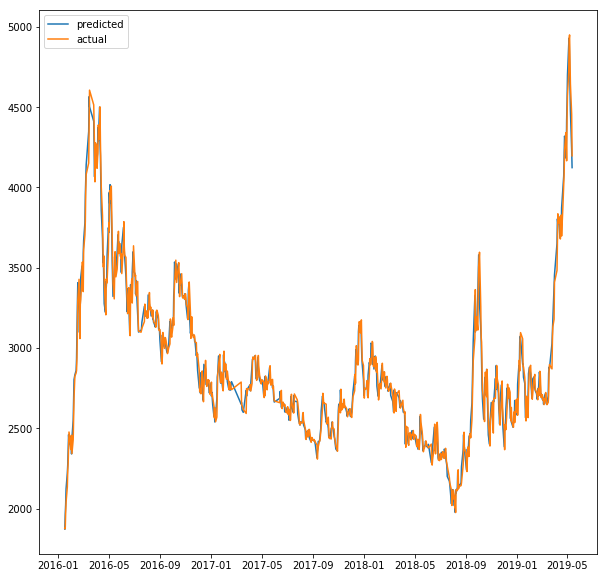

In [0]:
# plotting error with respect to prediction window
plt.figure(figsize=(10,10))
plt.plot(X_test['last'], label='predicted')
plt.plot(preds['prediction'], label='actual')
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(preds['buy'], X_test['buy'])

0.5206391478029294

## 2. D: LSTM Method for Prediction
Neural networks like Long Short-Term Memory (LSTM) recurrent neural networks are able to almost seamlessly model problems with multiple input variables. This is a great benefit in time series forecasting, where classical linear methods can be difficult to adapt to multivariate or multiple input forecasting problems. We will discover how you can develop an LSTM model for multivariate time series forecasting in the Keras deep learning library.

A LSTM network is a kind of recurrent neural network. A recurrent neural network is a neural network that attempts to model time or sequence dependent behaviour – such as language, stock prices, electricity demand and so on. This is performed by feeding back the output of a neural network layer at time t to the input of the same network layer at time t + 1. It looks like this:


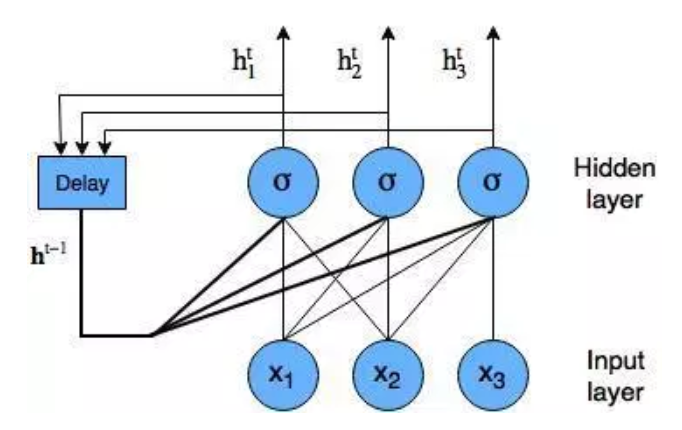


Recurrent neural networks are “unrolled” programmatically during training and prediction, so we get something like the following.

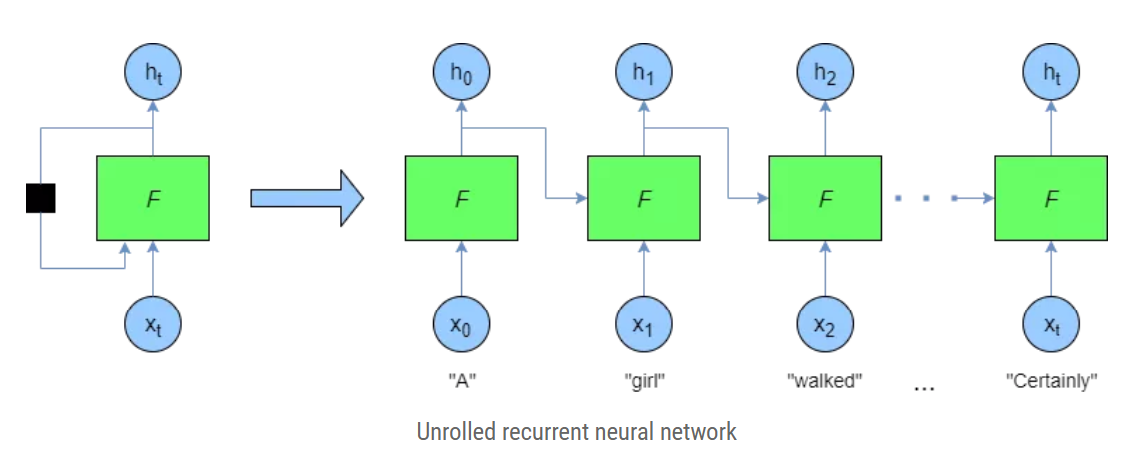

The problem with vanilla recurrent neural networks, constructed from regular neural network nodes, is that as we try to model dependencies between words or sequence values that are separated by a significant number of other words, we experience the vanishing gradient problem (and also sometimes  the exploding gradient problem) – to learn more about the vanishing gradient problem, see my post on the topic. This is because small gradients or weights (values less than 1) are multiplied many times over through the multiple time steps, and the gradients shrink asymptotically to zero. This means the weights of those earlier layers won’t be changed significantly and therefore the network won’t learn long-term dependencies.

As mentioned previously, in this Keras LSTM tutorial we will be building an LSTM network for text prediction. An LSTM network is a recurrent neural network that has LSTM cell blocks in place of our standard neural network layers. These cells have various components called the input gate, the forget gate and the output gate – these will be explained more fully later. Here is a graphical representation of the LSTM cell.

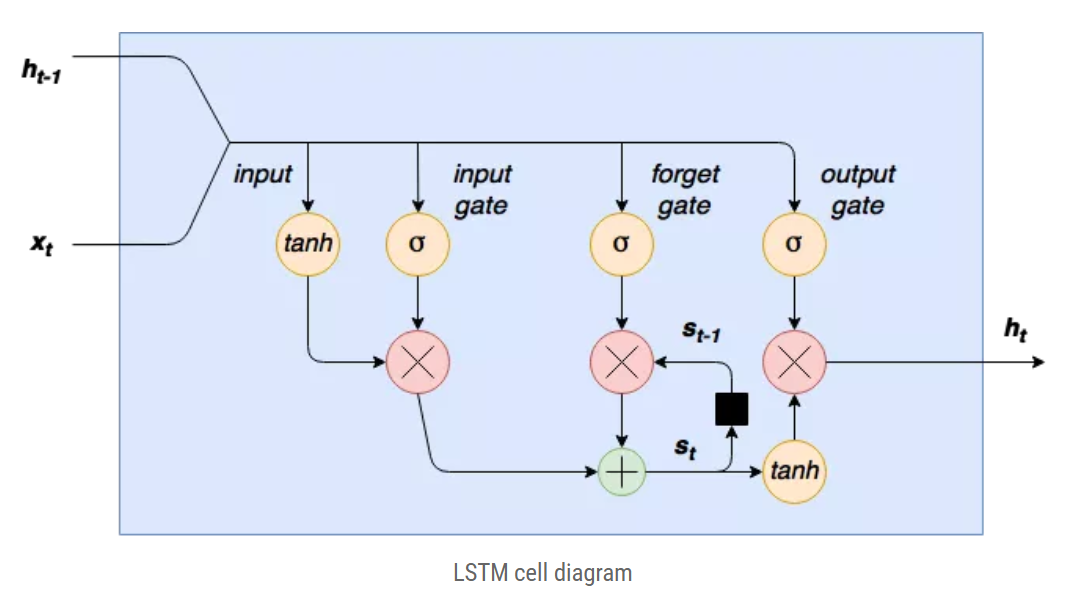

Notice first, on the left hand side, we have our new word/sequence value x_t being concatenated to the previous output from the cell h_t-1. The first step for this combined input is for it to be squashed via a tanh layer. The second step is that this input is passed through an input gate. An input gate is a layer of sigmoid activated nodes whose output is multiplied by the squashed input. These input gate sigmoids can act to “kill off” any elements of the input vector that aren’t required. A sigmoid function outputs values between 0 and 1, so the weights connecting the input to these nodes can be trained to output values close to zero to “switch off” certain input values (or, conversely, outputs close to 1 to “pass through” other values).

The next step in the flow of data through this cell is the internal state / forget gate loop. LSTM cells have an internal state variable s_t. This variable, lagged one time step i.e. s_t-1 is added to the input data to create an effective layer of recurrence. This addition operation, instead of a multiplication operation, helps to reduce the risk of vanishing gradients. However, this recurrence loop is controlled by a forget gate – this works the same as the input gate, but instead helps the network learn which state variables should be “remembered” or “forgotten”.

Finally, we have an output layer tanh squashing function, the output of which is controlled by an output gate. This gate determines which values are actually allowed as an output from the cell h_t.

In [0]:
df_Main = df_A # change to df_B .. df_E

# split into train and validation
split_indexes = (round(len(df_Main) * 0.8), round(len(df_Main) * 0.95))
  
print(split_indexes[0], len(df_A))
df_train = df_Main[:split_indexes[0]]
df_valid = df_Main[split_indexes[0] + 1:split_indexes[1]]
df_test  = df_Main[split_indexes[1] + 1:]

y_train = df_train['buy']
y_valid = df_valid['buy']
y_test = df_test['buy']

df_train = df_train.drop(['dprice', 'buy', 'date'], axis=1)
df_valid = df_valid.drop(['dprice', 'buy', 'date'], axis=1)
df_test  = df_test.drop(['dprice', 'buy', 'date'], axis=1)

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()


X_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns, index=df_train.index)
X_valid = pd.DataFrame(scaler.fit_transform(df_valid), columns=df_valid.columns, index=df_valid.index)
X_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns, index=df_test.index)


3010 3762


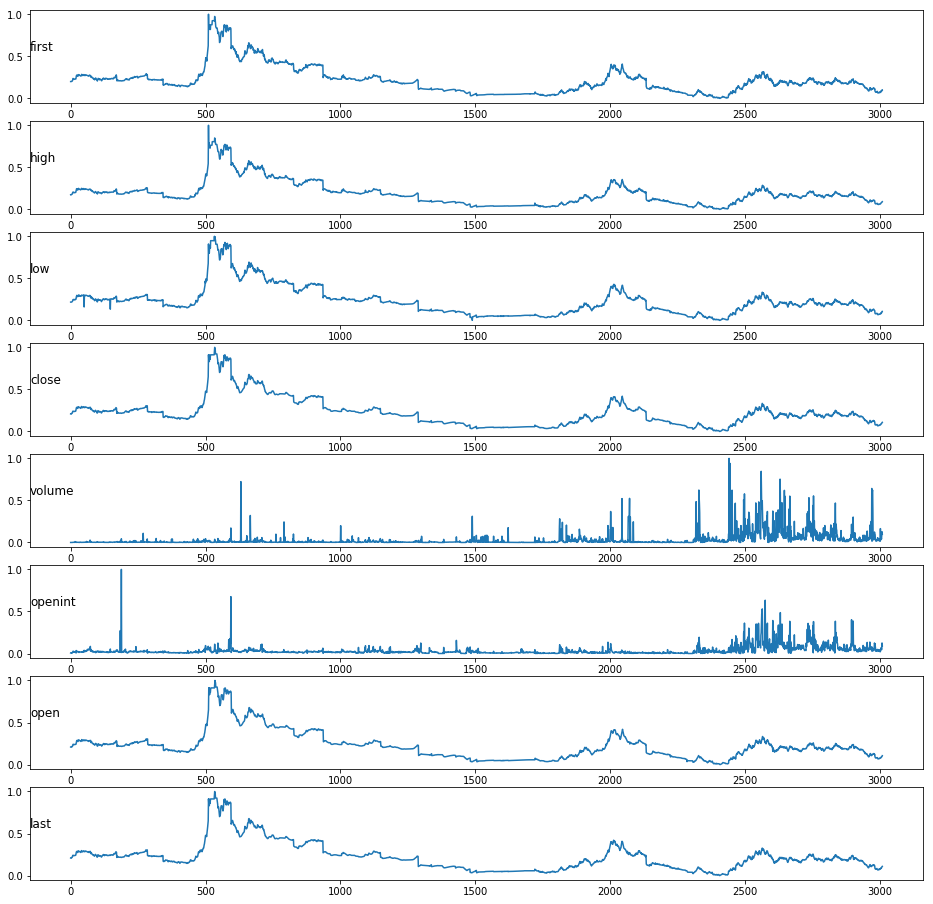

In [0]:
# specify columns to plot
plot_features(df=X_train)

In [0]:
X_train.head()

,first,high,low,close,value,volume,openint,open,last
date,,,,,,,,,
2001-03-25,0.199773,0.173897,0.217939,0.208646,0.000396,0.000530,0.006615,0.208432,0.208986
2001-03-26,0.200082,0.174617,0.217827,0.208432,0.000345,0.000461,0.005620,0.208646,0.208771
2001-03-27,0.199464,0.173717,0.217604,0.208110,0.000595,0.000799,0.006907,0.208432,0.208449
2001-03-28,0.199979,0.178128,0.217716,0.213903,0.000290,0.000384,0.005971,0.208110,0.214240
2001-03-31,0.204103,0.178038,0.218162,0.212723,0.000639,0.000851,0.009307,0.213903,0.213060


A key function to help transform time series data into a supervised learning problem is the Pandas shift() function.

Given a DataFrame, the shift() function can be used to create copies of columns that are pushed forward (rows of NaN values added to the front) or pulled back (rows of NaN values added to the end).

This is the behavior required to create columns of lag observations as well as columns of forecast observations for a time series dataset in a supervised learning format.

In [0]:
# convert series to supervised learning (from internet)
def series_to_supervised(df, n_in=1, n_out=1, dropnan=True):
	n_vars = df.shape[1]
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [0]:
X_train_s = series_to_supervised(X_train)
X_train_supervised = X_train_s.drop(columns=['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)'])
X_train_supervised.head()

,var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var9(t)
date,,,,,,
2001-03-26,0.000396,0.000530,0.006615,0.208432,0.208986,0.208771
2001-03-27,0.000345,0.000461,0.005620,0.208646,0.208771,0.208449
2001-03-28,0.000595,0.000799,0.006907,0.208432,0.208449,0.214240
2001-03-31,0.000290,0.000384,0.005971,0.208110,0.214240,0.213060
2001-04-03,0.000639,0.000851,0.009307,0.213903,0.213060,0.216277


In [0]:
X_valid_s = series_to_supervised(X_valid)
X_valid_supervised = X_valid_s.drop(columns=['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)'])
X_valid_supervised.head()

,var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var9(t)
date,,,,,,
2016-01-18,0.060331,0.141666,0.220849,0.010677,0.000000,0.034534
2016-01-19,0.064787,0.154989,0.207818,0.013255,0.034534,0.056443
2016-01-20,0.020632,0.047901,0.046943,0.000000,0.056443,0.093205
2016-01-23,0.105128,0.228323,0.270631,0.034610,0.093205,0.129224
2016-01-24,0.106007,0.224497,0.319997,0.068851,0.129224,0.148905


In [0]:
X_test_s = series_to_supervised(X_test)
X_test_supervised = X_test_s.drop(columns=['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)'])
X_test_supervised.head()

,var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var9(t)
date,,,,,,
2018-07-28,0.021542,0.043704,0.092992,0.062108,0.048409,0.017942
2018-07-29,0.054089,0.113457,0.202010,0.035349,0.017942,0.039269
2018-07-30,0.023294,0.048443,0.097519,0.003304,0.039269,0.025051
2018-07-31,0.046459,0.098040,0.133828,0.019161,0.025051,0.048070
2018-08-01,0.009351,0.019803,0.043734,0.000991,0.048070,0.032498


In [0]:
train_X = X_train_supervised.values[:, :-1]
train_y = X_train_supervised.values[:, -1]

valid_X = X_valid_supervised.values[:, :-1]
valid_y = X_valid_supervised.values[:, -1]

test_X = X_test_supervised.values[:, :-1]
test_y = X_test_supervised.values[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
valid_X = valid_X.reshape((valid_X.shape[0], 1, valid_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape, test_X.shape, test_y.shape)

(3009, 1, 5) (3009,) (562, 1, 5) (562,) (186, 1, 5) (186,)


Train on 3009 samples, validate on 562 samples
Epoch 1/20
 - 8s - loss: 0.1547 - val_loss: 0.1816
Epoch 2/20
 - 0s - loss: 0.0998 - val_loss: 0.1225
Epoch 3/20
 - 0s - loss: 0.0794 - val_loss: 0.1109
Epoch 4/20
 - 0s - loss: 0.0667 - val_loss: 0.0902
Epoch 5/20
 - 0s - loss: 0.0499 - val_loss: 0.0607
Epoch 6/20
 - 0s - loss: 0.0345 - val_loss: 0.0433
Epoch 7/20
 - 0s - loss: 0.0181 - val_loss: 0.0287
Epoch 8/20
 - 0s - loss: 0.0114 - val_loss: 0.0277
Epoch 9/20
 - 0s - loss: 0.0104 - val_loss: 0.0251
Epoch 10/20
 - 0s - loss: 0.0091 - val_loss: 0.0252
Epoch 11/20
 - 0s - loss: 0.0089 - val_loss: 0.0250
Epoch 12/20
 - 0s - loss: 0.0084 - val_loss: 0.0255
Epoch 13/20
 - 0s - loss: 0.0085 - val_loss: 0.0252
Epoch 14/20
 - 0s - loss: 0.0082 - val_loss: 0.0251
Epoch 15/20
 - 0s - loss: 0.0080 - val_loss: 0.0251
Epoch 16/20
 - 0s - loss: 0.0078 - val_loss: 0.0250
Epoch 17/20
 - 0s - loss: 0.0075 - val_loss: 0.0251
Epoch 18/20
 - 0s - loss: 0.0071 - val_loss: 0.0244
Epoch 19/20
 - 0s - loss: 

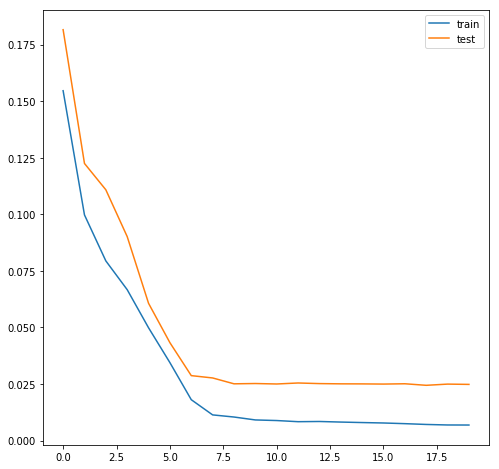

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM

# design network
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mae', optimizer='adam')
# fit network
history = lstm_model.fit(train_X, train_y, epochs=20, batch_size=64, validation_data=(valid_X, valid_y), verbose=2, shuffle=False)
# plot history
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [0]:
# make a prediction
lstm_predictions = lstm_model.predict(test_X)

In [0]:
lstm_pred_df = pd.DataFrame(lstm_predictions, columns=['price'])
lstm_test_df = pd.DataFrame(test_y, columns=['price'])

lstm_test_df.head()

,price
0,0.017942
1,0.039269
2,0.025051
3,0.048070
4,0.032498


In [0]:
lstm_pred_df['dprice'] = lstm_pred_df['price'].shift(-1) - lstm_pred_df['price']
lstm_pred_df['buy'] = (lstm_pred_df['dprice'] > 0).astype(int)

lstm_test_df['dprice'] = lstm_test_df['price'].shift(-1)- lstm_test_df['price']
lstm_test_df['buy'] = (lstm_test_df['dprice'] > 0).astype(int)

lstm_test_df.head()

,price,dprice,buy
0,0.017942,0.021327,1
1,0.039269,-0.014218,0
2,0.025051,0.023020,1
3,0.048070,-0.015572,0
4,0.032498,-0.018619,0


In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(lstm_pred_df['buy'], lstm_test_df['buy'])

0.553763440860215

### LSTM Classifier **Method**

Now we use LSTM classifier with 3 LSTM layers and an output Dense Softmax layer. The softmax function, also known as softargmax or normalized exponential function, is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities. A dense layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer, thus densely connected. The layer has a weight matrix W, a bias vector b, and the activations of previous layer a. An LSTM network is a recurrent neural network that has LSTM cell blocks in place of our standard neural network layers. These cells have various components which is beyound the scope of this report.

In [0]:
from keras.utils import np_utils
train_y_class = np_utils.to_categorical(y_train.values[1:], 2)
valid_y_class = np_utils.to_categorical(y_valid.values[1:], 2)
test_y_class = np_utils.to_categorical(y_test.values[1:], 2)

In [0]:
data_dim = 9
timesteps = 1
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
lstm_class_model = Sequential()
# returns a sequence of vectors of dimension 32
lstm_class_model.add(LSTM(32, return_sequences=True,
               input_shape=(train_X.shape[1], train_X.shape[2])))
# returns a sequence of vectors of dimension 32
lstm_class_model.add(LSTM(32, return_sequences=True))
# return a single vector of dimension 32
lstm_class_model.add(LSTM(32))  
lstm_class_model.add(Dense(2, activation='softmax'))

lstm_class_model.compile(loss='categorical_crossentropy',
                         optimizer='rmsprop',
                         metrics=['accuracy'])


history = lstm_class_model.fit(train_X, train_y_class,
          batch_size=64, epochs=20,
          validation_data=(valid_X, valid_y_class))

Train on 3009 samples, validate on 562 samples
Epoch 1/20
3009/3009 [==============================] - 7s 2ms/step - loss: 0.6920 - acc: 0.5278 - val_loss: 0.6886 - val_acc: 0.5552
Epoch 2/20
3009/3009 [==============================] - 0s 112us/step - loss: 0.6909 - acc: 0.5324 - val_loss: 0.6872 - val_acc: 0.5552
Epoch 3/20
3009/3009 [==============================] - 0s 114us/step - loss: 0.6909 - acc: 0.5324 - val_loss: 0.6868 - val_acc: 0.5552
Epoch 4/20
3009/3009 [==============================] - 0s 125us/step - loss: 0.6907 - acc: 0.5324 - val_loss: 0.6872 - val_acc: 0.5552
Epoch 5/20
3009/3009 [==============================] - 0s 121us/step - loss: 0.6906 - acc: 0.5324 - val_loss: 0.6865 - val_acc: 0.5552
Epoch 6/20
3009/3009 [==============================] - 0s 126us/step - loss: 0.6904 - acc: 0.5324 - val_loss: 0.6873 - val_acc: 0.5552
Epoch 7/20
3009/3009 [==============================] - 0s 119us/step - loss: 0.6902 - acc: 0.5324 - val_loss: 0.6857 - val_acc: 0.5552
Epo

The pickle module implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”.

In [0]:
# To save:
import pickle
with open('model.lstm', 'wb') as file:
  pickle.dump(lstm_class_model, file)

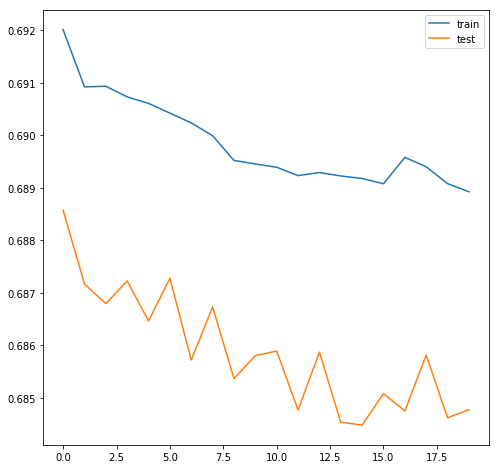

In [0]:
# plot history
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [0]:
# To load:
with open('model.lstm', 'rb') as file:
    loaded_class = pickle.load(file)

We measure the accuracy score of this method which seems highly accurate with accuracy of over 97%.

In [0]:
# evaluation
import numpy as np
prediction = np.asarray([np.argmax(e) for e in loaded_class.predict(test_X)])
accuracy_score(prediction, test_y.astype(int))

0.9731182795698925